In [2]:
import fxcmpy

con = fxcmpy.fxcmpy(config_file='fxcm.cfg')
print(con.get_candles('EUR/USD', period='m1', number=3))

con.close()


|WARNING|2023-01-19 23:01:22,474|Default account set to 1342146, to change use set_default_account().


                     bidopen  bidclose  bidhigh   bidlow  askopen  askclose  \
date                                                                          
2023-01-19 21:58:00  1.08305   1.08304  1.08311  1.08296  1.08313   1.08315   
2023-01-19 21:59:00  1.08303   1.08307  1.08307  1.08264  1.08315   1.08349   
2023-01-19 22:00:00  1.08306   1.08273  1.08317  1.08273  1.08349   1.08347   

                     askhigh   asklow  tickqty  
date                                            
2023-01-19 21:58:00  1.08320  1.08307       86  
2023-01-19 21:59:00  1.08369  1.08300      152  
2023-01-19 22:00:00  1.08383  1.08347       10  


In [1]:
import fxcmpy
print(fxcmpy.__version__)

1.3.3


### get_candles

In [3]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2020, 1, 22, 23, 50)
date_end = dt.datetime(2020, 1, 22, 23, 59)

db = kdb.KragleDB('FX_2020_GEN_22')
v = db.get_candles('EUR/USD', 'm5', date_end, 2)
pp.pprint(v)

[{'askclose': 1.10961,
  'askhigh': 1.10964,
  'asklow': 1.1095,
  'askopen': 1.1095,
  'bidclose': 1.10955,
  'bidhigh': 1.10958,
  'bidlow': 1.10944,
  'bidopen': 1.10945,
  'date': datetime.datetime(2020, 1, 22, 23, 55),
  'tickqty': 283},
 {'_id': ObjectId('63cb33c63a25a7383d77475d'),
  'askclose': 1.1095,
  'askhigh': 1.10958,
  'asklow': 1.10947,
  'askopen': 1.10948,
  'bidclose': 1.10945,
  'bidhigh': 1.10952,
  'bidlow': 1.10939,
  'bidopen': 1.10942,
  'date': datetime.datetime(2020, 1, 22, 23, 50),
  'tickqty': 164}]


### calc_mean_stddev

In [2]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_start = dt.datetime(2021, 1, 1)
date_end = dt.datetime(2021, 5, 31,)

db = kdb.KragleDB('FX_2020_2021')
v = db.calc_mean_stddev('EUR/USD', 'm1', date_start, date_end)
pp.pprint(v)

{'bidopen-mean': 0.00011594279860246181,
 'bidopen-stddev': 0.8242580674716756,
 'tickqty-mean': 0.40272353284787743,
 'tickqty-stddev': 0.3762696817328249}


### get_sample

In [1]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

date_end = dt.datetime(2021, 1, 5, 14, 57)

db = kdb.KragleDB('FX_2020_2021')
v = db.get_sample(to_date = date_end, n= 5)
pp.pprint(v)

{'date': datetime.datetime(2021, 1, 5, 14, 57),
 'x': [[[1.4999999999998348, 1.1525],
        [-1.9999999999997797, 1.1425],
        [-0.5999999999994898, 0.765],
        [-2.100000000000435, 1.115],
        [-0.2999999999997449, 0.92]],
       [[-0.8666666666664232, 1.0075],
        [-1.1333333333333566, 1.352],
        [-0.3000000000004851, 1.7275],
        [-0.23333333333338166, 1.8015],
        [-0.4666666666660232, 1.331]],
       [[1.4666666666665051, 0.6108333333333333],
        [-0.8133333333333326, 0.873],
        [-0.5199999999998539, 0.6958333333333333],
        [0.10666666666647728, 0.7219166666666667],
        [-1.5333333333333126, 0.6241666666666666]],
       [[-1.3800000000000108, 0.874475],
        [0.7199999999999799, 0.60045],
        [0.9333333333333785, 0.865125],
        [-0.9266666666666682, 0.54995],
        [-0.04666666666667633, 0.35945]],
       [[-0.3266666666666603, 0.7225],
        [0.963333333333353, 0.3125875],
        [-1.8566666666666916, 0.84705625],
 

### duplicate_db

In [3]:
import kragle.kdb as kdb
import datetime as dt
import kragle.utils as kutils

date_start = dt.datetime(2019, 1, 1)
date_end = dt.datetime(2021, 12, 31)

dbname = 'FX_2019_2022'
db = kdb.KragleDB('FX_RAW')
olddb = kdb.KragleDB(dbname)
olddb.drop_db()
newdb = db.duplicate_db(dbname, from_date=date_start, to_date=date_end, fields=kutils.FIELDS)
newdb.get_periods()

['D1', 'H2', 'm1', 'm30', 'm5', 'H8']

## Create Dataset

In [7]:
import kragle.kdb as kdb
import datetime as dt
import pprint as pp

from_date = dt.datetime(2019, 2, 1)
to_date = dt.datetime(2022, 12, 1)
periods=['m1', 'm5', 'm30', 'H2', 'H8', 'D1']
db = kdb.KragleDB('FX_2019_2022')
db.create_dataset( 1000, from_date, to_date, 
                  periods=periods, history_len=10, pips=15, limit_future=600,distribution=[0.7, 0.2, 0.1])
print('END')


Dataset len: 50/1000
Dataset len: 50/1000
Dataset len: 100/1000
Dataset len: 150/1000
Dataset len: 200/1000
Dataset len: 250/1000
Dataset len: 300/1000
Dataset len: 350/1000
Dataset len: 400/1000
Dataset len: 450/1000
Dataset len: 500/1000
Dataset len: 500/1000
Dataset len: 500/1000
Dataset len: 550/1000
Dataset len: 550/1000
Dataset len: 600/1000
Dataset len: 650/1000
Dataset len: 650/1000
Dataset len: 700/1000
Dataset len: 700/1000
Dataset len: 750/1000
Dataset len: 800/1000
Dataset len: 800/1000
Dataset len: 850/1000
Dataset len: 900/1000
Dataset len: 950/1000
Dataset len: 1000/1000
END


In [17]:
import kragle.fxcm_utils as fxutils
import datetime as dt
import logging.config

logging.config.fileConfig('log.cfg')

start = dt.datetime(2015, 1, 1)
end = dt.datetime(2016, 1, 1)


m = fxutils.FxcmManager(dbname='FX_RAW')
m.fetch_instrument(start, end)
m.close()

print('END')


WARNING | Default account set to 1342146, to change use set_default_account().
END


### Tensorflow

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (1, 3), activation='relu', input_shape=(6, 10, 2), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(layers.BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 10, 32)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 10, 32)         9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 10, 64)         18496     
                                                                 
 dropout (Dropout)           (None, 6, 10, 64)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 10, 64)         36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 10, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 3840)              0

### Compiling Model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'],
              run_eagerly=True)



### Training Model

In [6]:
history = model.fit(train_set, train_labels, epochs=50, validation_data=valid, class_weight={0:8, 1:1, 2:8})

Epoch 1/50
341/341 [==============================] - 25s 72ms/step - loss: 5.5478 - accuracy: 0.4561 - val_loss: 1.0463 - val_accuracy: 0.4897
Epoch 2/50
341/341 [==============================] - 24s 71ms/step - loss: 5.4633 - accuracy: 0.4843 - val_loss: 1.0175 - val_accuracy: 0.4992
Epoch 3/50
341/341 [==============================] - 24s 72ms/step - loss: 5.3234 - accuracy: 0.5182 - val_loss: 0.9846 - val_accuracy: 0.5070
Epoch 4/50
341/341 [==============================] - 25s 72ms/step - loss: 5.1542 - accuracy: 0.5514 - val_loss: 0.9906 - val_accuracy: 0.5331
Epoch 5/50
341/341 [==============================] - 25s 72ms/step - loss: 4.8485 - accuracy: 0.5975 - val_loss: 0.9758 - val_accuracy: 0.5353
Epoch 6/50
341/341 [==============================] - 25s 72ms/step - loss: 4.4570 - accuracy: 0.6432 - val_loss: 0.9058 - val_accuracy: 0.5718
Epoch 7/50
341/341 [==============================] - 25s 72ms/step - loss: 4.0168 - accuracy: 0.6790 - val_loss: 0.9685 - val_accuracy:

### Plotting Accuracy

49/49 - 1s - loss: 1.4871 - accuracy: 0.6524 - 779ms/epoch - 16ms/step
0.6524234414100647


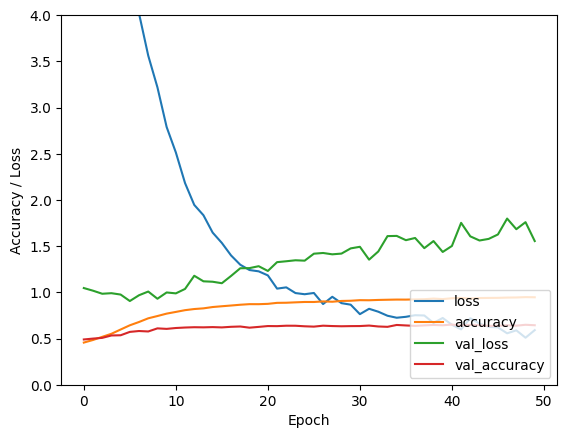

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.ylim([0, 4])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test[0],  test[1], verbose=2)

print(test_acc)

In [12]:
print("Evaluate on test data on BUY")
results = model.evaluate(test_BUY[0],test_BUY[1])
print("test loss, test acc:", results)
print("Evaluate on test data on SELL")
results = model.evaluate(test_SELL[0],test_SELL[1])
print("test loss, test acc:", results)
print("Evaluate on test data on HOLD")
results = model.evaluate(test_HOLD[0],test_HOLD[1])
print("test loss, test acc:", results)


Evaluate on test data on BUY
24/24 [==============================] - 0s 16ms/step - loss: 1.4411 - accuracy: 0.6503
test loss, test acc: [1.4411362409591675, 0.6502659320831299]
Evaluate on test data on SELL
21/21 [==============================] - 0s 17ms/step - loss: 1.0838 - accuracy: 0.7104
test loss, test acc: [1.0837801694869995, 0.7104477882385254]
Evaluate on test data on HOLD
5/5 [==============================] - 0s 16ms/step - loss: 3.5751 - accuracy: 0.3973
test loss, test acc: [3.575082778930664, 0.39726027846336365]


### Load Dataset

In [1]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
(train_set, train_labels), valid, test = db.get_dataset(ds_name='pips15hist10fut600')


In [2]:
print(len(train_labels))
pp.pprint((train_labels))
    

10893
array([2, 0, 0, ..., 0, 1, 0])


In [10]:
import numpy

import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB('Datasets')
test_SELL = db.get_dataset_bytype(ds_name='pips12hist10fut600', nclass=-1)
test_HOLD = db.get_dataset_bytype(ds_name='pips12hist10fut600', nclass=0)
test_BUY = db.get_dataset_bytype(ds_name='pips12hist10fut600', nclass=1)


In [11]:
print(test_SELL[1])
print(test_HOLD[1])
print(test_BUY[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Percentuale

In [13]:
import kragle.kdb as kdb
import pprint as pp
db = kdb.KragleDB()

s, h, b = db.get_dataset_percentage('pips15hist10fut600', type='test')
print('Sell: {}%   Hold: {}%   Buy: {}%'.format(s*100, h*100, b*100))

Sell: 35.82089552238806%   Hold: 20.8955223880597%   Buy: 43.28358208955223%
